In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
b = pd.read_csv("books.csv")
r = pd.read_csv("ratingS.csv")
t = pd.read_csv("book_tags.csv")

In [73]:
b.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')

In [5]:
t

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78
...,...,...,...
40195,31845516,13254,7
40196,31845516,19734,7
40197,31845516,833,7
40198,31845516,23471,6


In [6]:
r

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4
...,...,...,...
233378,36947,6939,5
233379,22352,617,2
233380,42785,1613,4
233381,10622,610,5


In [54]:
# 1) How many books do not have an original title [books.csv]?
l = b[b['original_title'].isna()]
print("No of books with no original title:",len(l))

No of books with no original title: 36


In [55]:
l1 = l['book_id'].to_list()#book id that has null values
l0 = l['goodreads_book_id'].to_list()

In [56]:
# 2) How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records
# containing null values for original_title  column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]
l2 = r[r['book_id'].isin(l1)].index.to_list()#rating csv cleaning
r.drop(l2,inplace = True)
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225939 entries, 0 to 233382
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  225939 non-null  int64
 1   book_id  225939 non-null  int64
 2   rating   225939 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


In [57]:
l3 = t[t['goodreads_book_id'].isin(l0)].index.to_list()
t.drop(l3,inplace = True)
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36600 entries, 0 to 40199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   goodreads_book_id  36600 non-null  int64
 1   tag_id             36600 non-null  int64
 2   count              36600 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [58]:
b.dropna(subset = ['original_title'],inplace = True)
unique = b['book_id'].unique().size
print("Unique books:",unique)

Unique books: 363


In [27]:
r

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4
...,...,...,...
233378,36947,6939,5
233379,22352,617,2
233380,42785,1613,4
233381,10622,610,5


In [28]:
# 3) How many unique users are present in the dataset [ratings.csv] ?
print("Unique users in ratings.csv :",r['user_id'].nunique())

Unique users in ratings.csv : 40573


In [59]:
t

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78
...,...,...,...
40195,31845516,13254,7
40196,31845516,19734,7
40197,31845516,833,7
40198,31845516,23471,6


In [33]:
# 4) How many unique tags are there in the dataset [book_tags.csv] ?
print("Unique tags in book_tags.csv :",t['tag_id'].nunique())

Unique tags in book_tags.csv : 3459


In [47]:
# 5) Which tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv]  ? 
# (In case of more than one tag, mention the tag id with the least numerical value)’.
counts = pd.DataFrame(t['tag_id'].value_counts())
# counts.max()[0]
cout = counts[counts["tag_id"]==counts.max()[0]].index.to_list()
cout.sort()
print(" tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv] :",cout[0])

 tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv] : 4600


In [60]:
t

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78
...,...,...,...
40195,31845516,13254,7
40196,31845516,19734,7
40197,31845516,833,7
40198,31845516,23471,6


In [85]:
# 6) Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .
counts_tags = pd.DataFrame(t.groupby('goodreads_book_id')['count'].sum())#as for same id we have multiple count we is going to geopy by using id and summing all the count
counts_tags.max()
index = counts_tags[counts_tags["count"]==counts_tags.max()[0]].index.to_list()
# index[0]
b[b['goodreads_book_id'] == index[0]]['title']

5    Bossypants
Name: title, dtype: object

In [101]:
# 7) Plot a bar chart with top 20 unique tags in descending order of ‘user records’ 
# (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]
un = list(t['tag_id'].unique())
un.sort(reverse = True)
tag = un[:20]
xa = t[t["tag_id"].isin(tag)]
xaxis = xa['goodreads_book_id'].to_list()
yaxis = xa['count'].to_list()


In [112]:
xaxis

[1848,
 2159,
 3465,
 10884,
 10884,
 11690,
 11690,
 11690,
 11690,
 46349,
 46349,
 54270,
 54270,
 54270,
 54270,
 54270,
 73864,
 79834,
 92057,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 103342,
 112803,
 112803,
 318431,
 318431,
 328802,
 361459,
 361459,
 361459,
 361459,
 393199,
 522534,
 613283,
 821611,
 821611,
 17727276]

In [113]:
yaxis

[21,
 16,
 6,
 14,
 9,
 14,
 6,
 5,
 5,
 19,
 13,
 29,
 27,
 22,
 8,
 8,
 4,
 4,
 35,
 63,
 32,
 14,
 14,
 13,
 10,
 8,
 6,
 6,
 6,
 4,
 21,
 13,
 18,
 14,
 6,
 20,
 18,
 16,
 11,
 25,
 5,
 5,
 19,
 18,
 5]

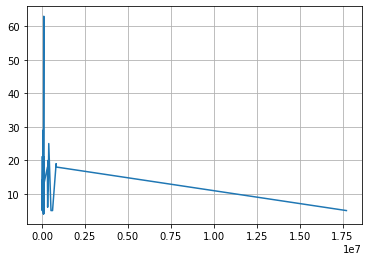

In [111]:

plt.plot(xaxis,yaxis)

plt.grid()
plt.show()